## Gender Classification

In [4]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib

### Loading Data

In [5]:
df = pd.read_csv("data/gender_dataset.csv")
print("Data shape:", df.shape)
print(df.head())

Data shape: (5001, 8)
   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  


In [6]:
print(df.isna().sum()) #to see any missing values

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


In [26]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


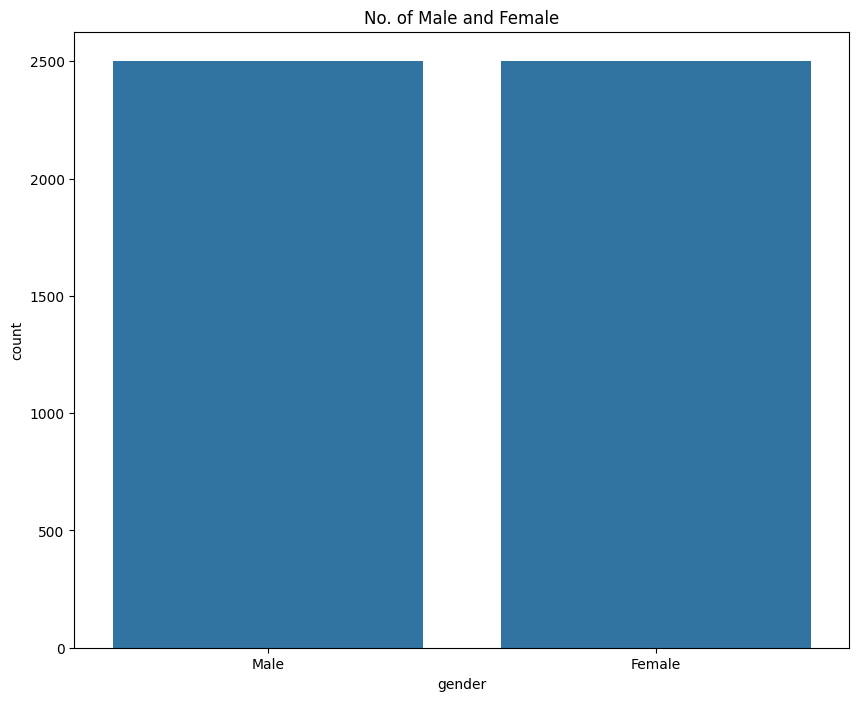

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x="gender", data=df)
plt.title("No. of Male and Female")
plt.show()

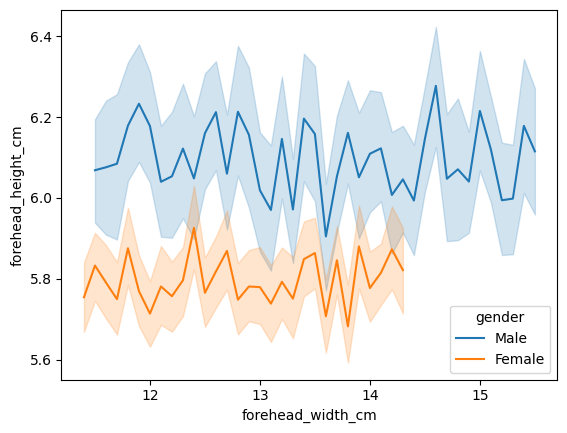

In [28]:
#visualising forehead length data
sns.lineplot(
    data=df,
    x="forehead_width_cm",
    y="forehead_height_cm",
    hue="gender"
)
plt.show()


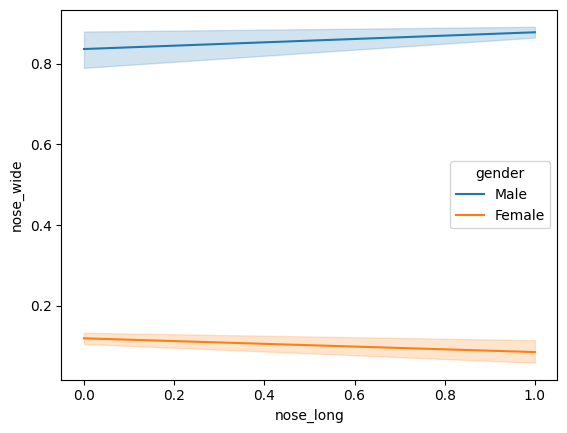

In [29]:
#visualising nose length data
sns.lineplot(
    data=df,
    x="nose_long",
    y="nose_wide",
    hue="gender"
)
plt.show()


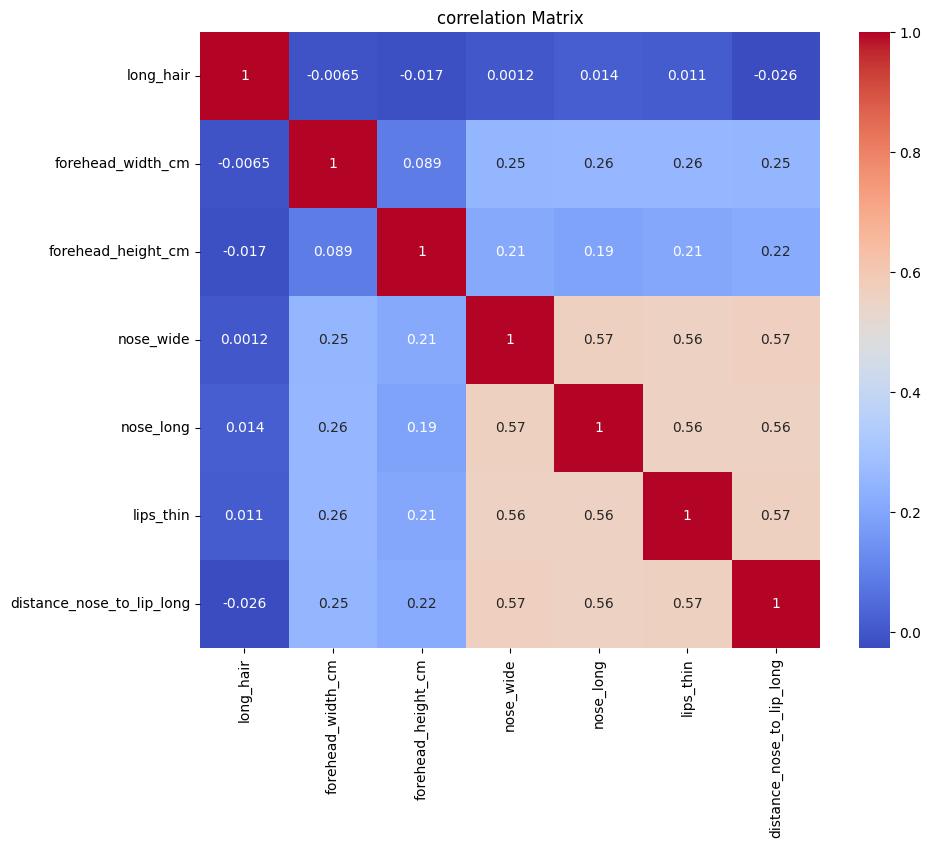

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("correlation Matrix")
plt.show()


In [7]:
le = LabelEncoder()
df['gender_enc'] = le.fit_transform(df['gender'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", mapping)  

Label mapping: {'Female': np.int64(0), 'Male': np.int64(1)}


In [38]:
x = df.drop("gender", axis=1)
y = df["gender"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 7)
(1001, 7)
(4000,)
(1001,)


In [44]:
#randomforestClassifier 
rf = RandomForestClassifier(random_state=0)

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('Accuracy of Random Forest is: {:.2f}%'.format(rf_acc*100))

Accuracy of Random Forest is: 95.90%


In [1]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
lr = LogisticRegression(random_state=0)

lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Accuracy of Logistic Regression is: {:.2f}%'.format(lr_acc*100))

Accuracy of Logistic Regression is: 96.00%
